In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')


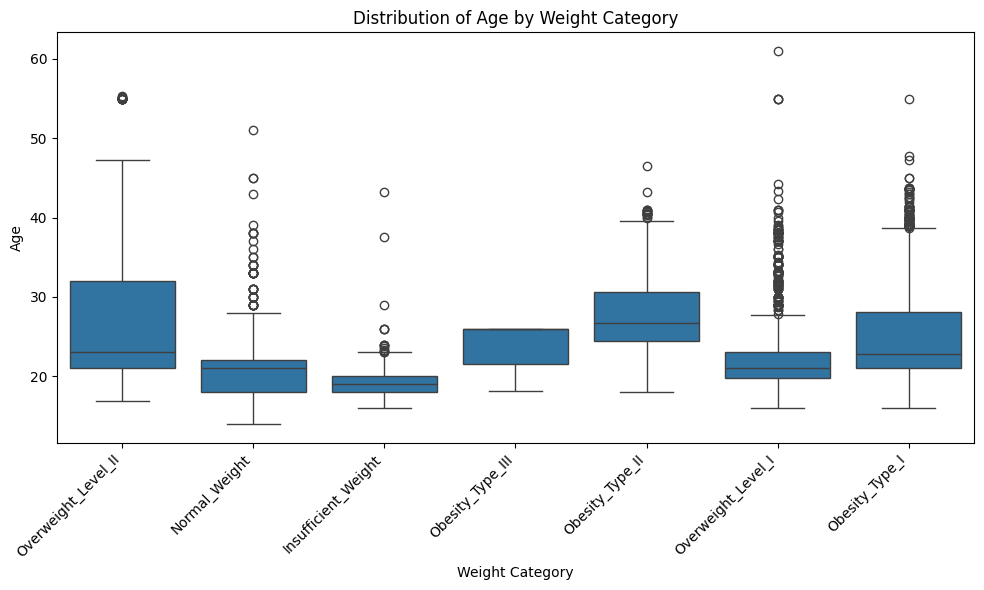

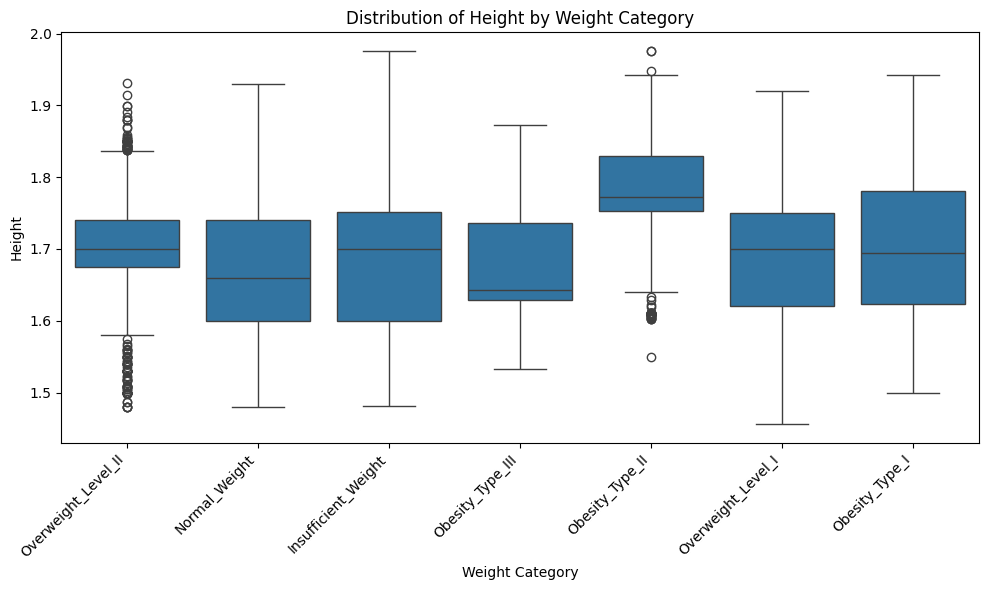

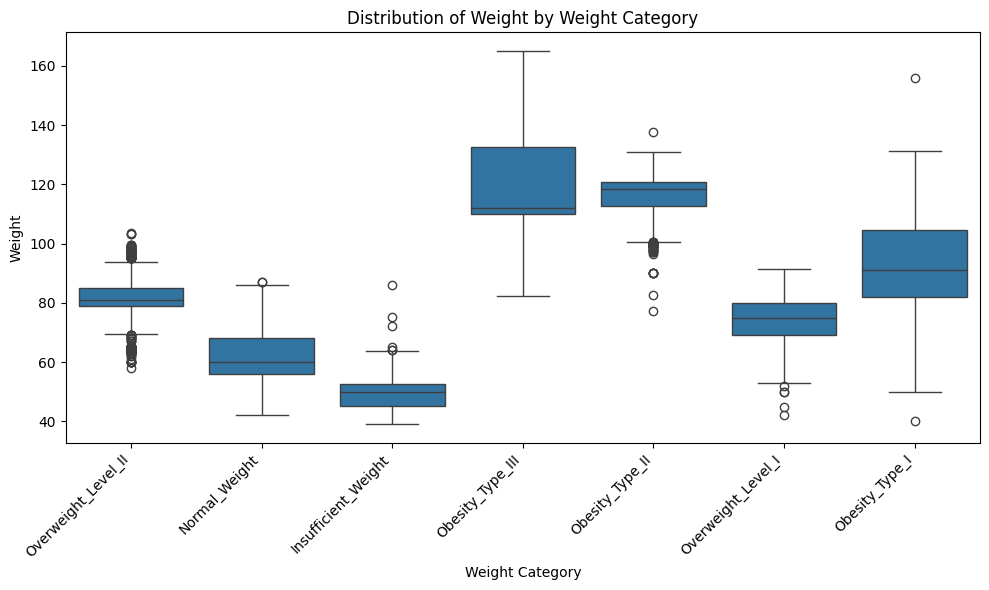

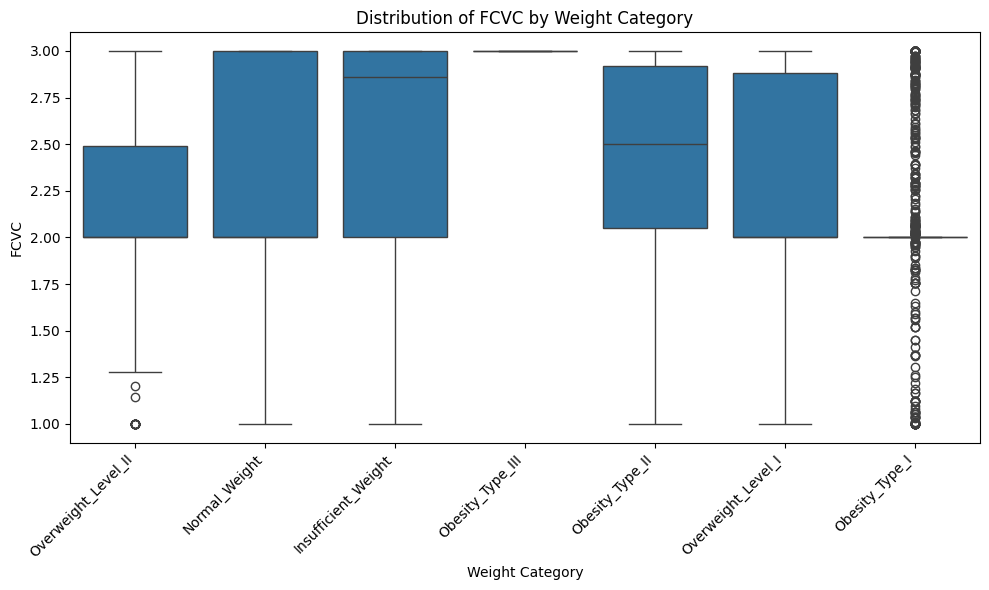

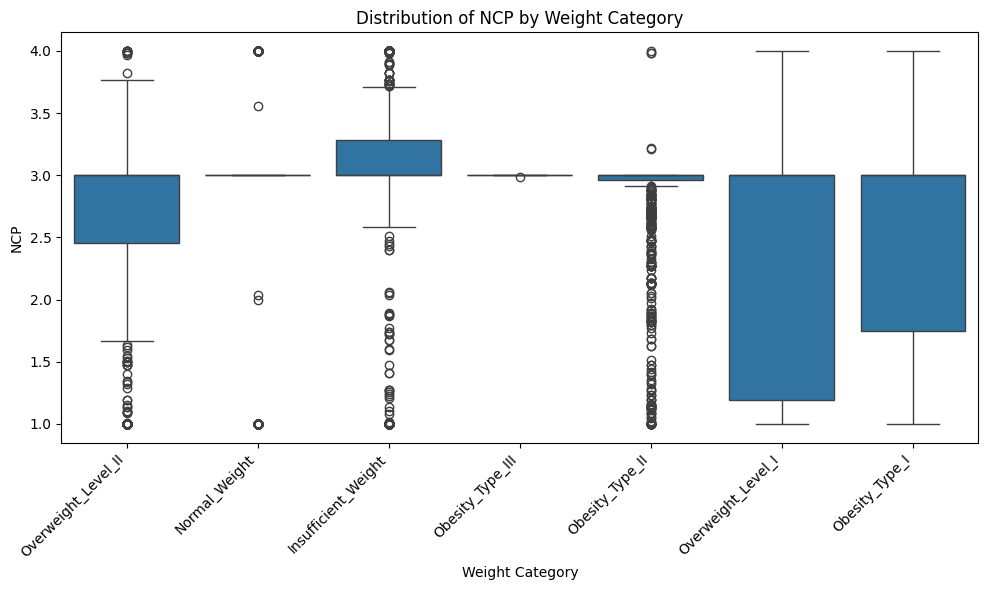

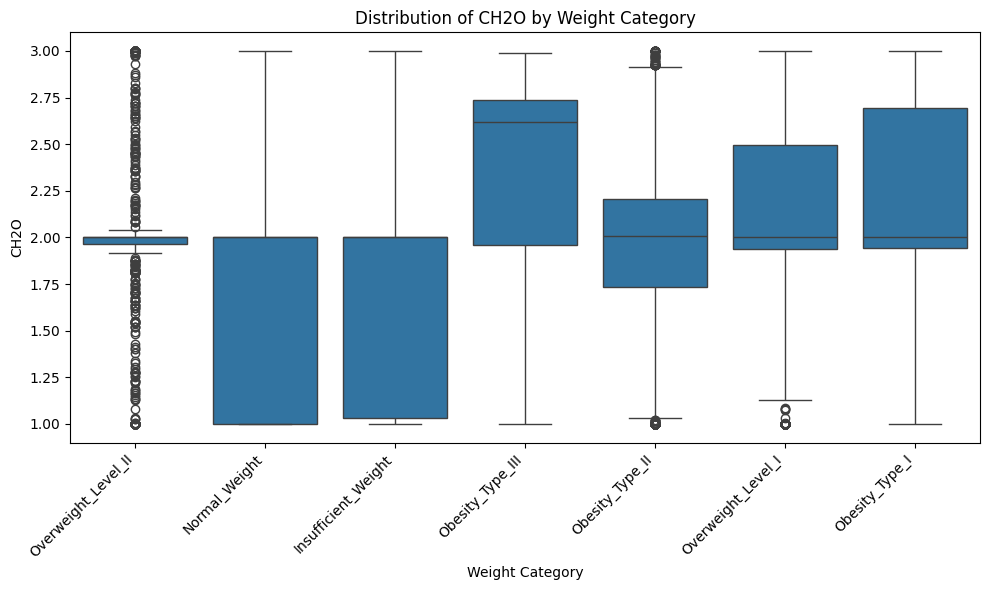

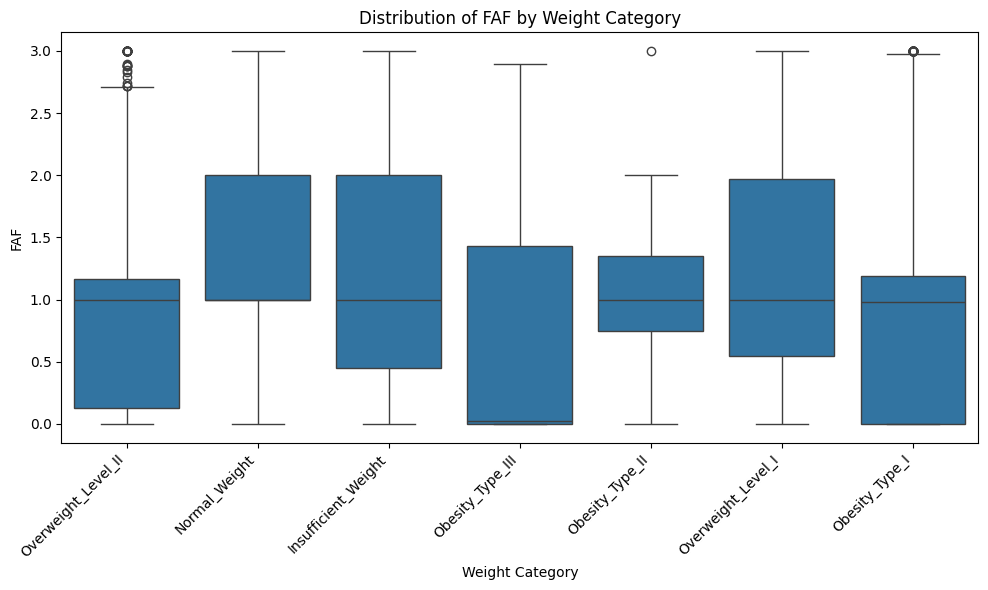

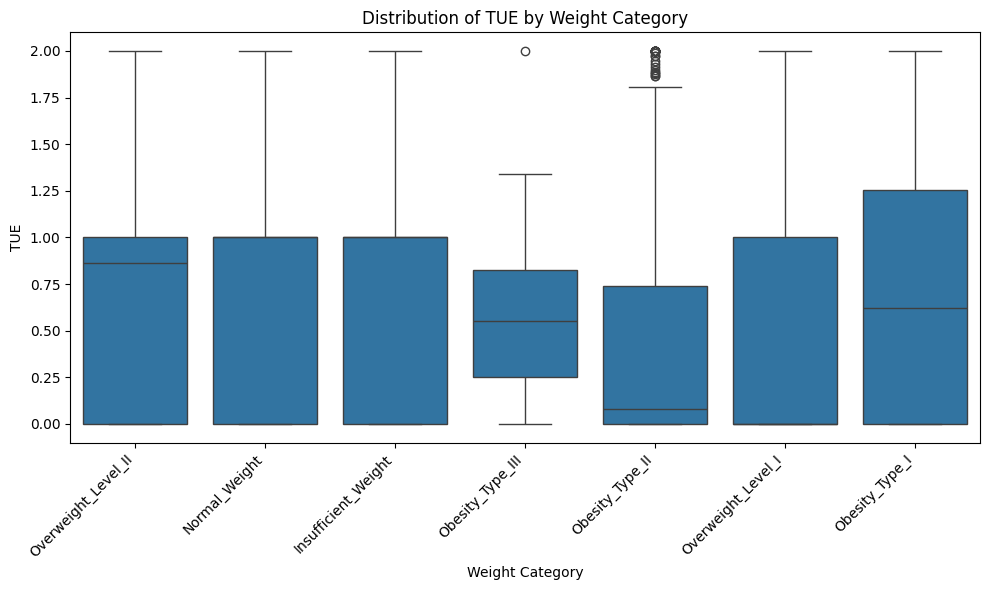

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='WeightCategory', y=col)
    plt.title(f'Distribution of {col} by Weight Category')
    plt.xlabel('Weight Category')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{col}_boxplot.png') # Save the plot as a PNG file
    plt.show()

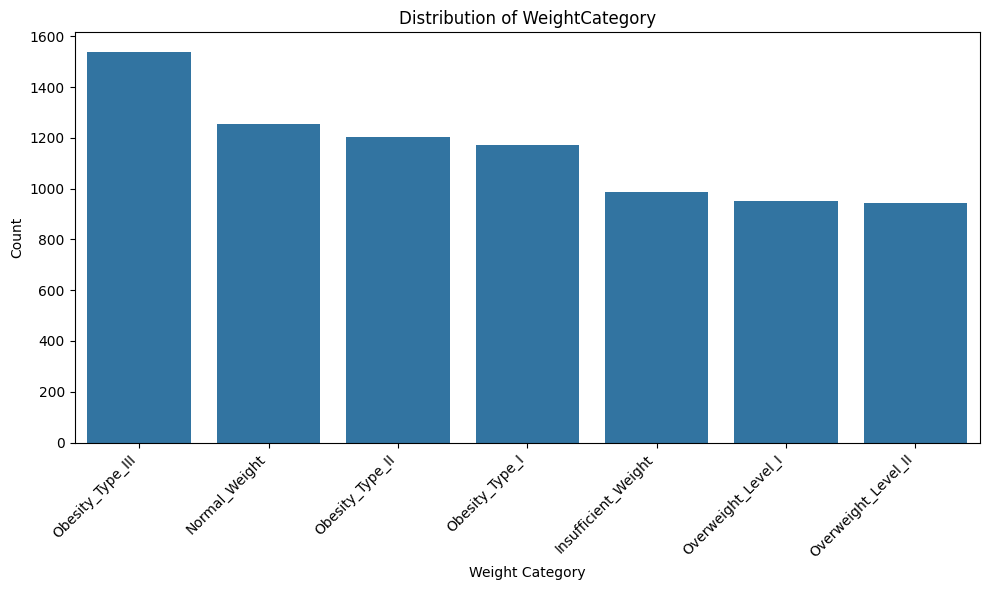

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='WeightCategory', order=train_df['WeightCategory'].value_counts().index)
plt.title('Distribution of WeightCategory')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# Exclude the target variable 'WeightCategory' from the categorical columns to be encoded in the training set
categorical_cols_train = [col for col in categorical_cols if col != 'WeightCategory']

train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols_train, drop_first=True)

# Categorical columns for test set encoding should not include 'WeightCategory'
categorical_cols_test = [col for col in categorical_cols if col != 'WeightCategory']
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=True)


# Align columns - crucial for consistent feature sets between train and test
train_cols = list(train_df_encoded.columns)
test_cols = list(test_df_encoded.columns)

# Remove target variable from train_cols if it exists
if 'WeightCategory' in train_cols:
    train_cols.remove('WeightCategory')

# Find columns unique to train or test
unique_to_train = set(train_cols) - set(test_cols)
unique_to_test = set(test_cols) - set(train_cols)

# Add missing columns to the other dataframe with default value 0
for col in unique_to_train:
    test_df_encoded[col] = 0
for col in unique_to_test:
    train_df_encoded[col] = 0

# Ensure the order of columns is the same
test_df_encoded = test_df_encoded[train_cols]


# Define X and y
X = train_df_encoded.drop(['id', 'WeightCategory'], axis=1)
y = train_df_encoded['WeightCategory']

# Define X_test
X_test = test_df_encoded.drop('id', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_test:", X_test.shape)

Shape of X: (15533, 22)
Shape of y: (15533,)
Shape of X_test: (5225, 22)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test_split, y_train, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test_split:", X_test_split.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test_split:", y_test_split.shape)

Shape of X_train: (12426, 22)
Shape of X_test_split: (3107, 22)
Shape of y_train: (12426,)
Shape of y_test_split: (3107,)


**Reasoning**:
Define the evaluation function as requested in the instructions.



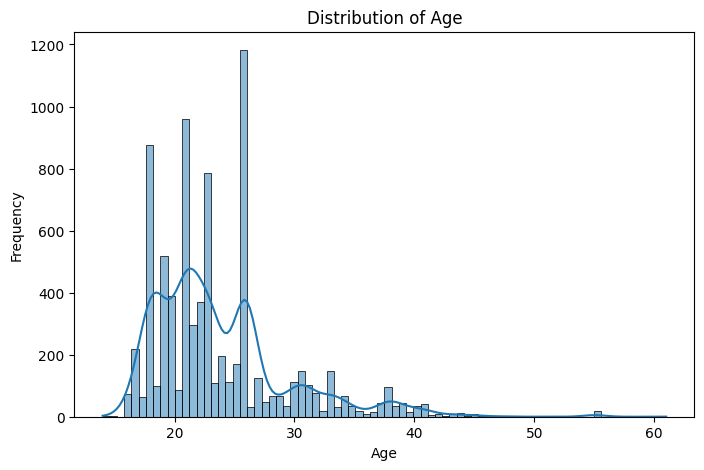

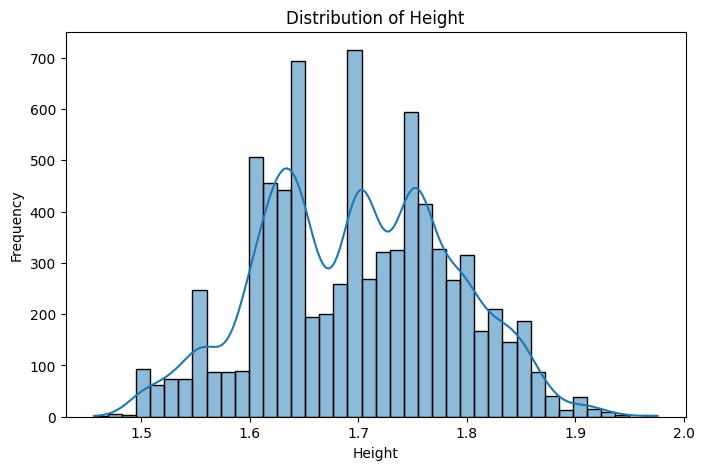

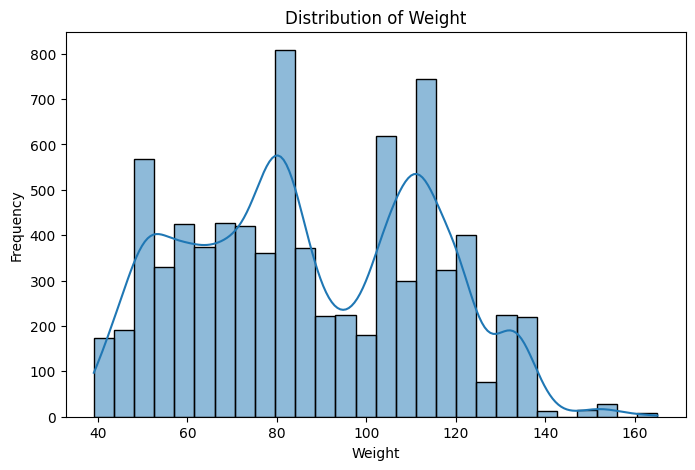

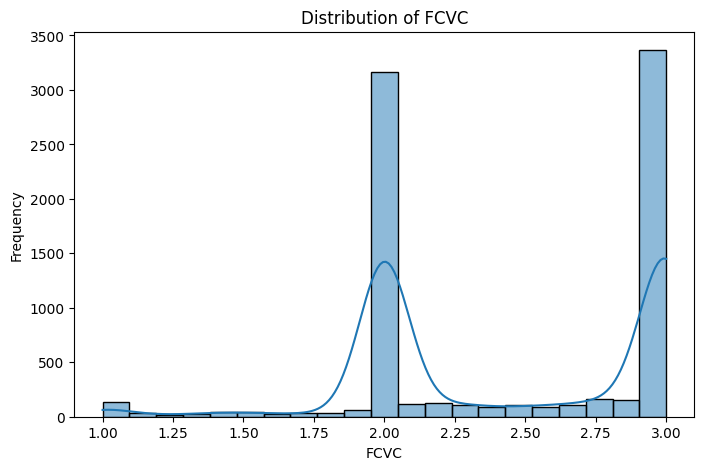

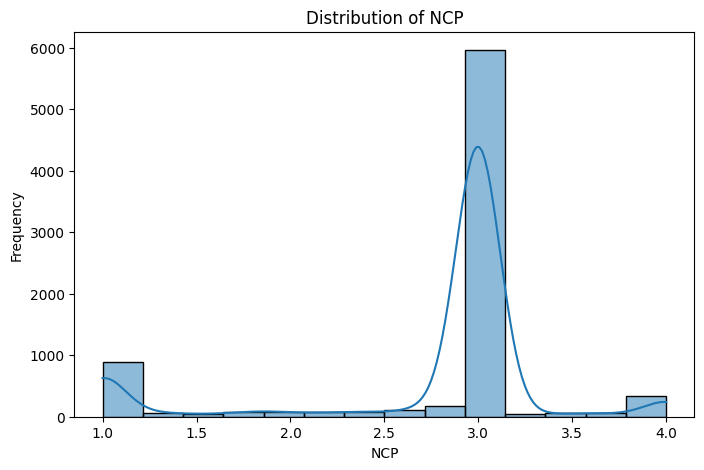

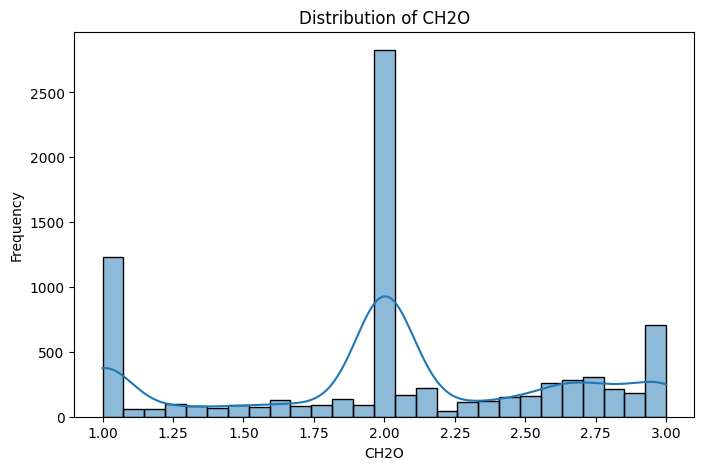

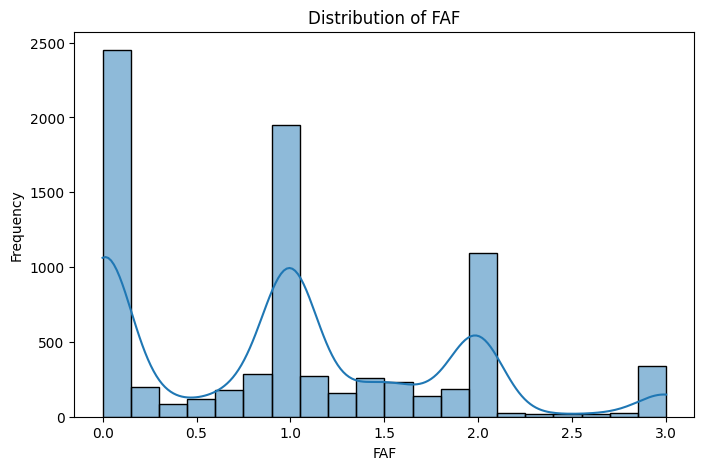

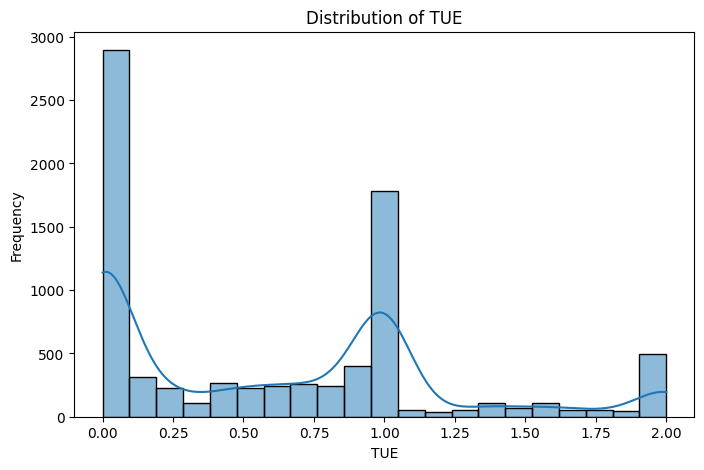

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the 'id' column if it's in the numerical columns
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Create histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

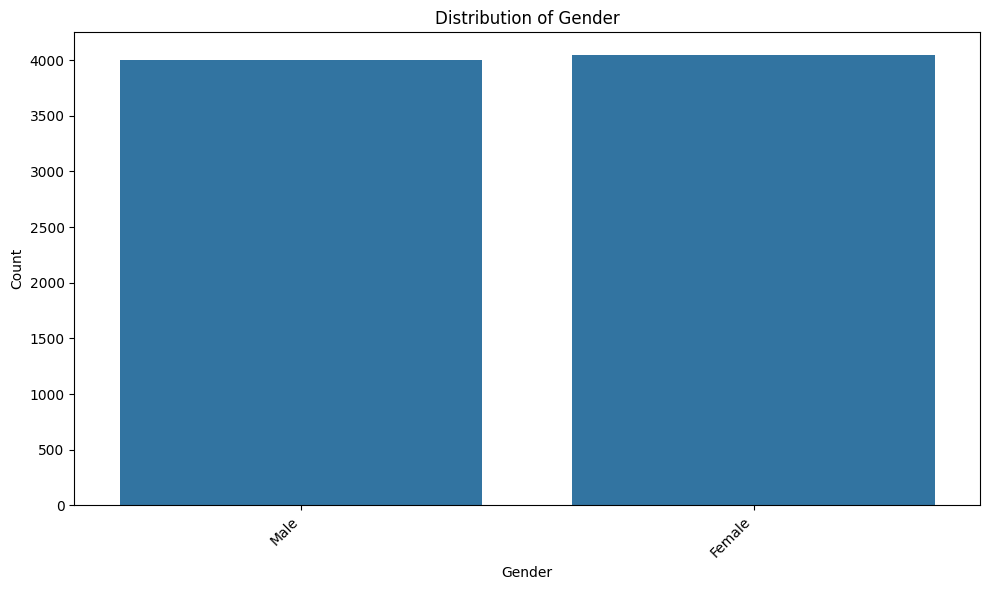

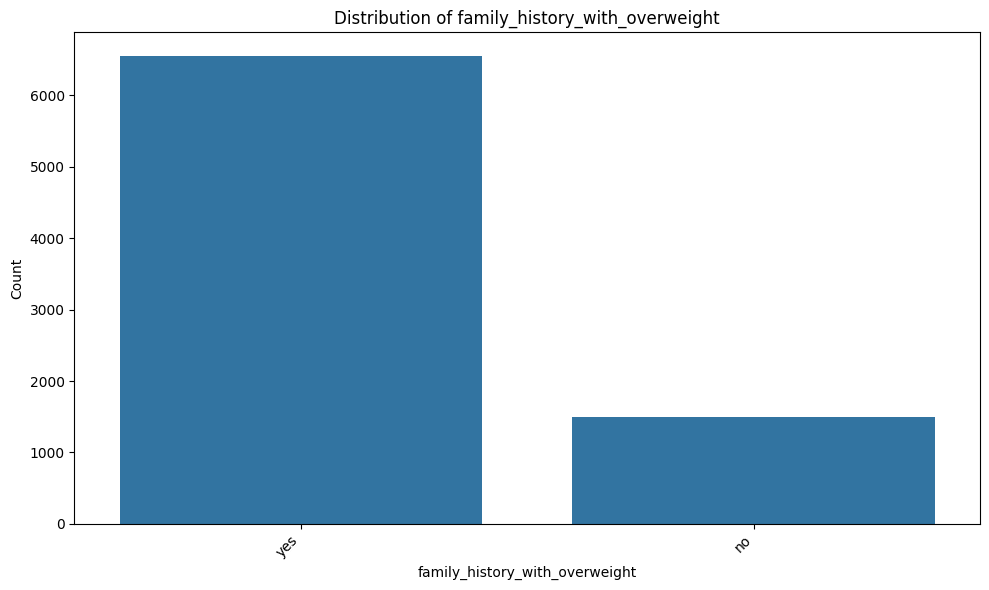

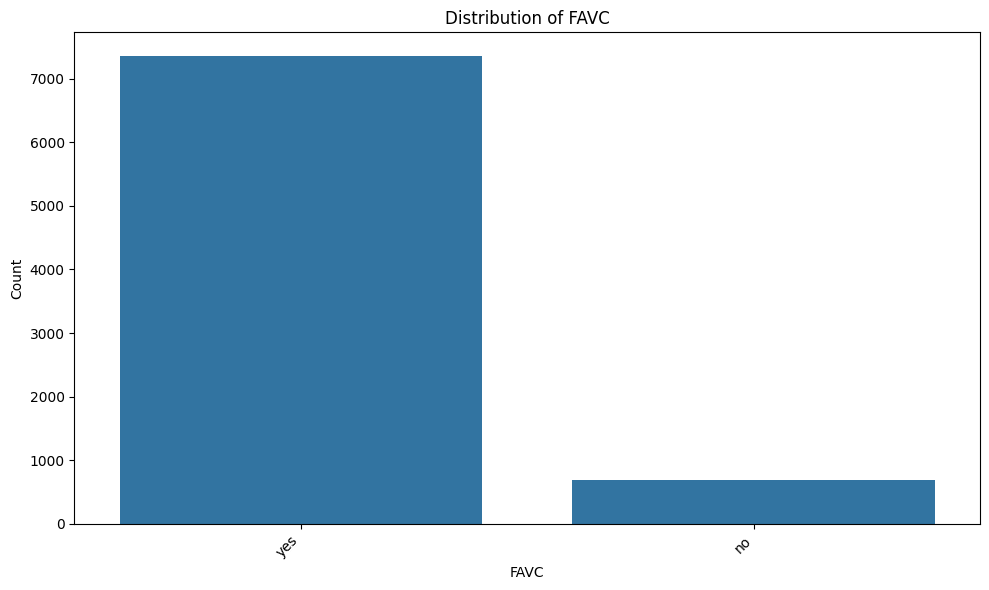

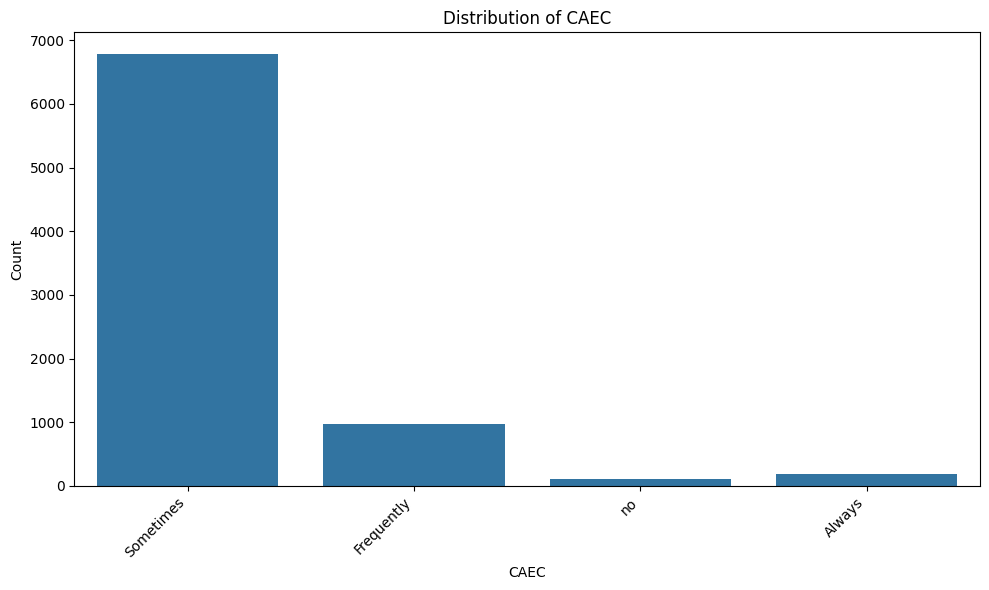

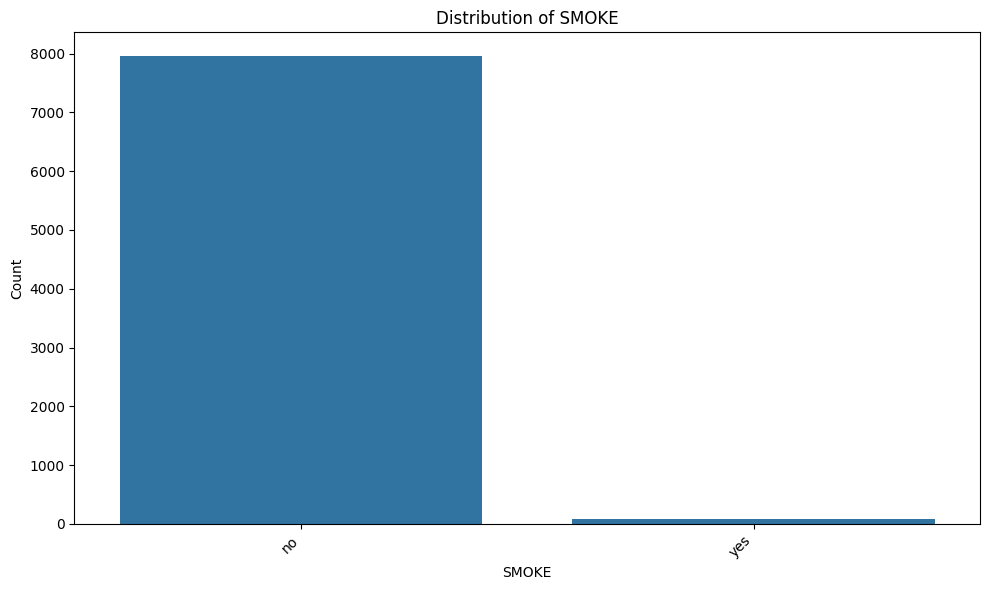

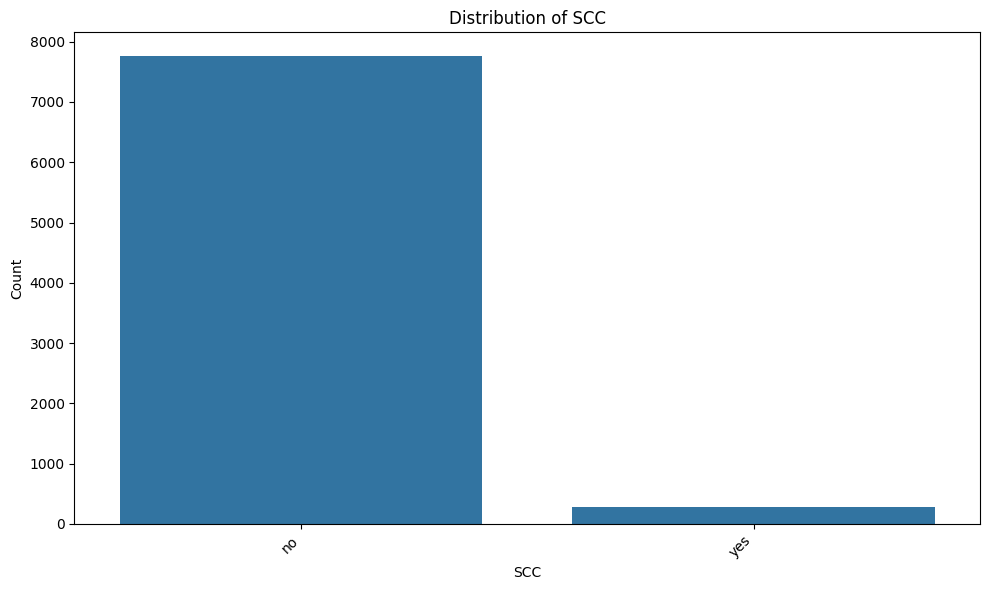

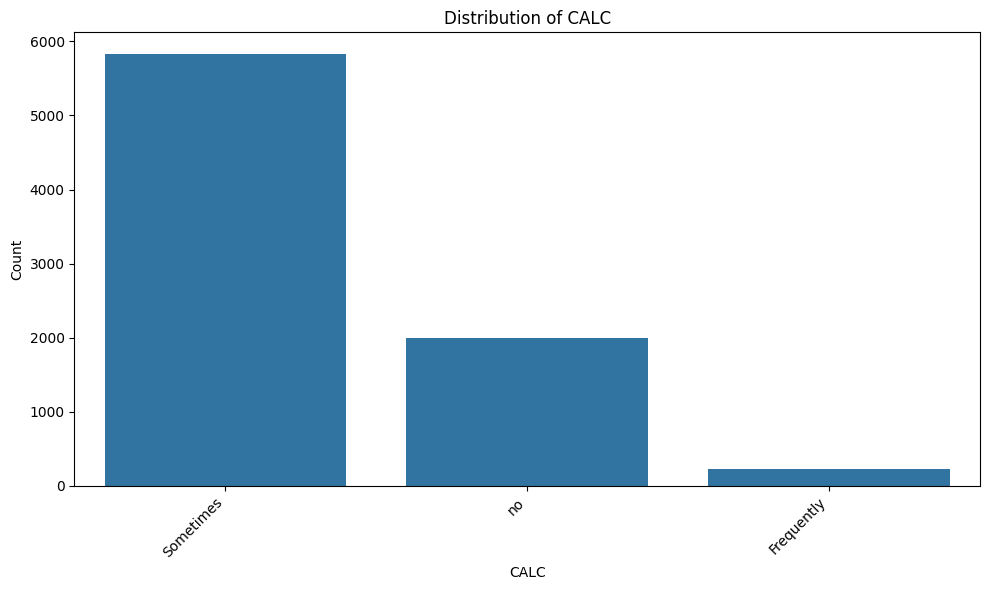

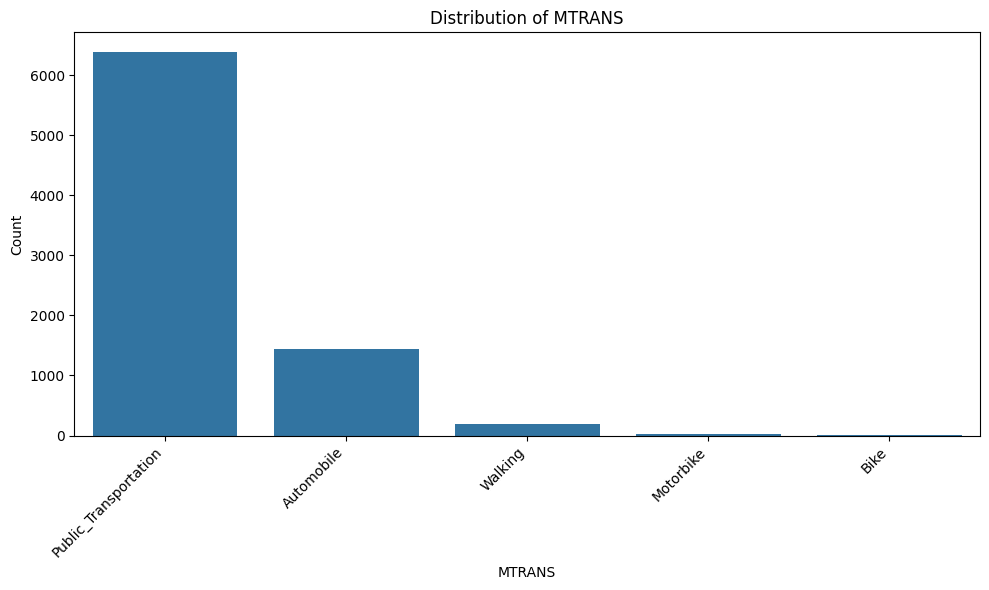

In [ ]:
# Select categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# Remove the 'WeightCategory' column from the list
if 'WeightCategory' in categorical_cols:
    categorical_cols.remove('WeightCategory')

# Create count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

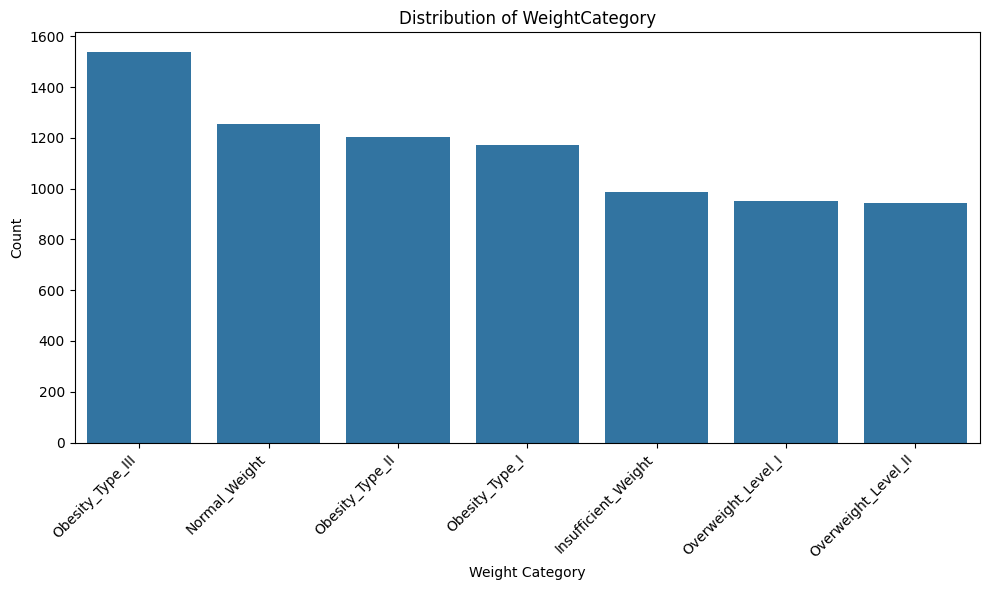

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='WeightCategory', order=train_df['WeightCategory'].value_counts().index)
plt.title('Distribution of WeightCategory')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

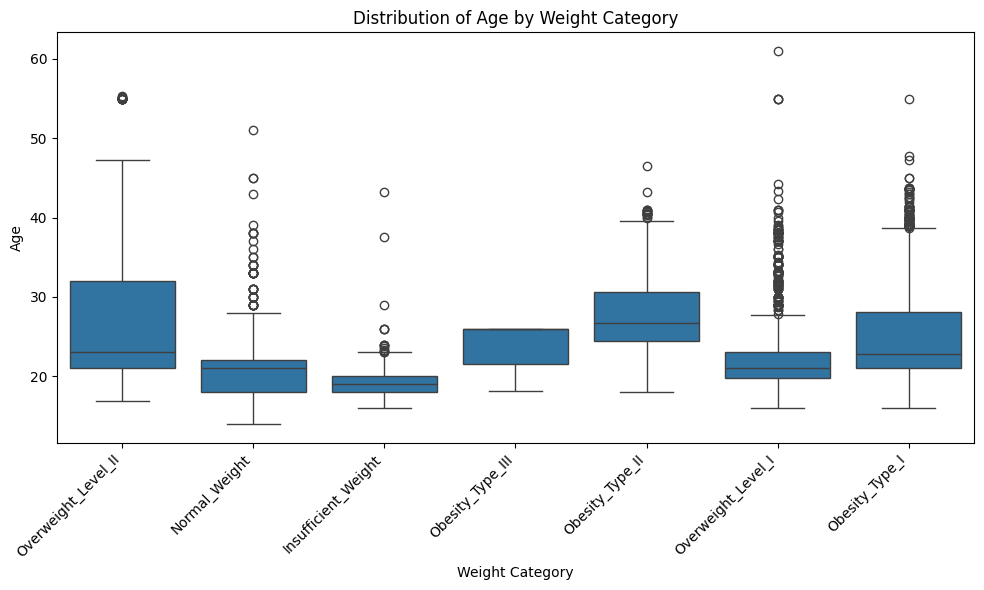

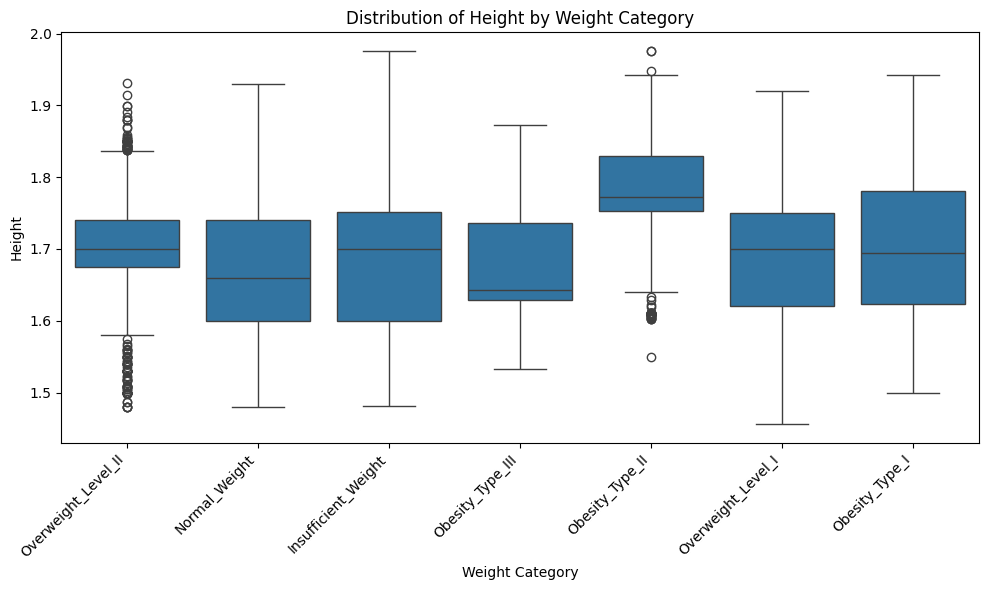

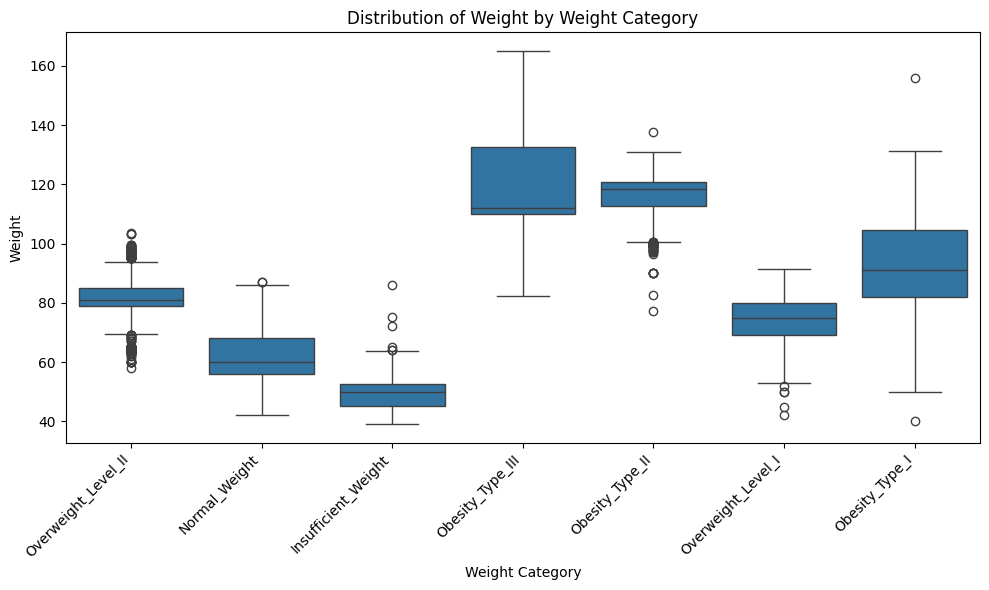

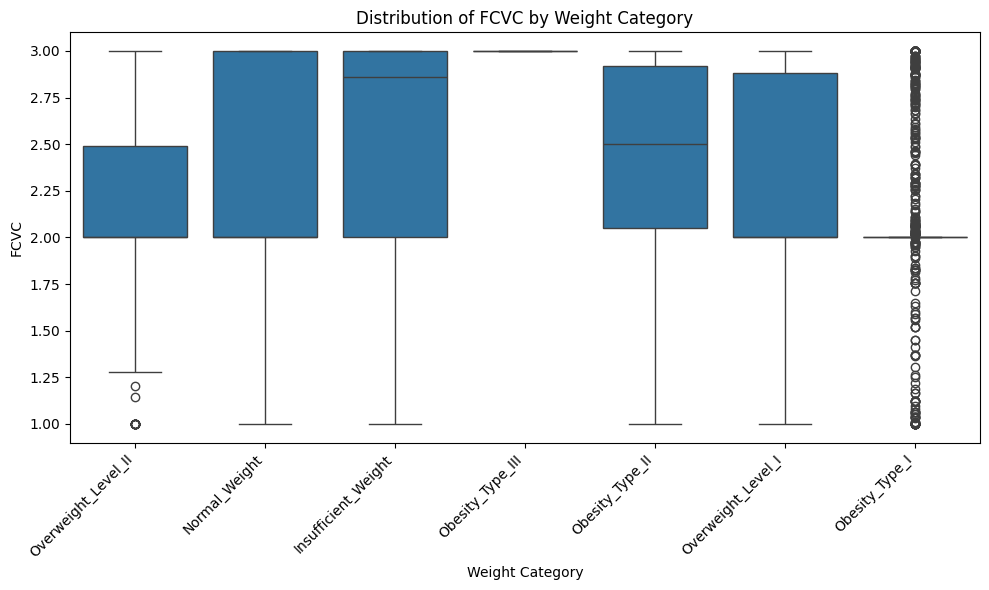

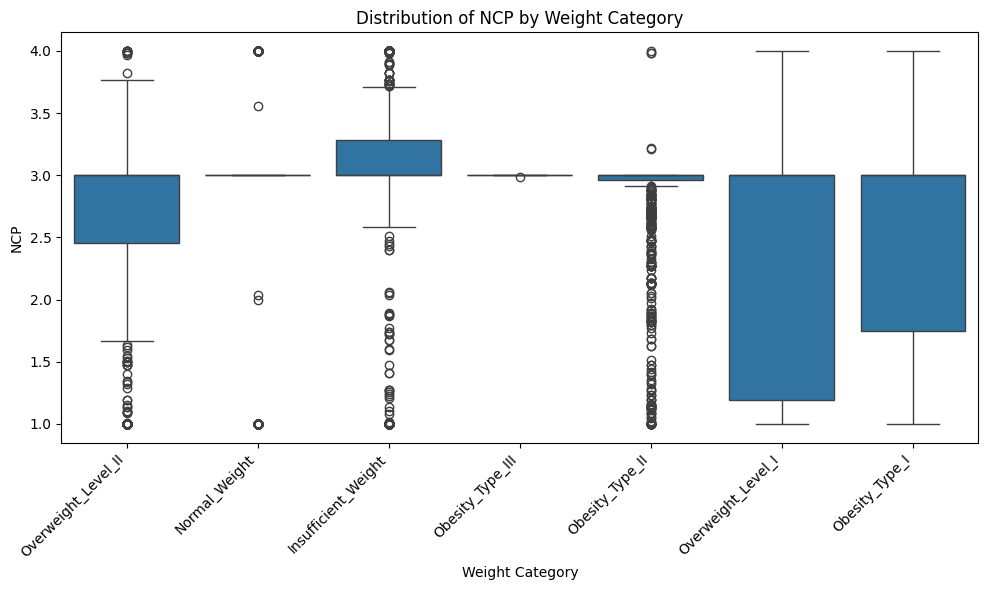

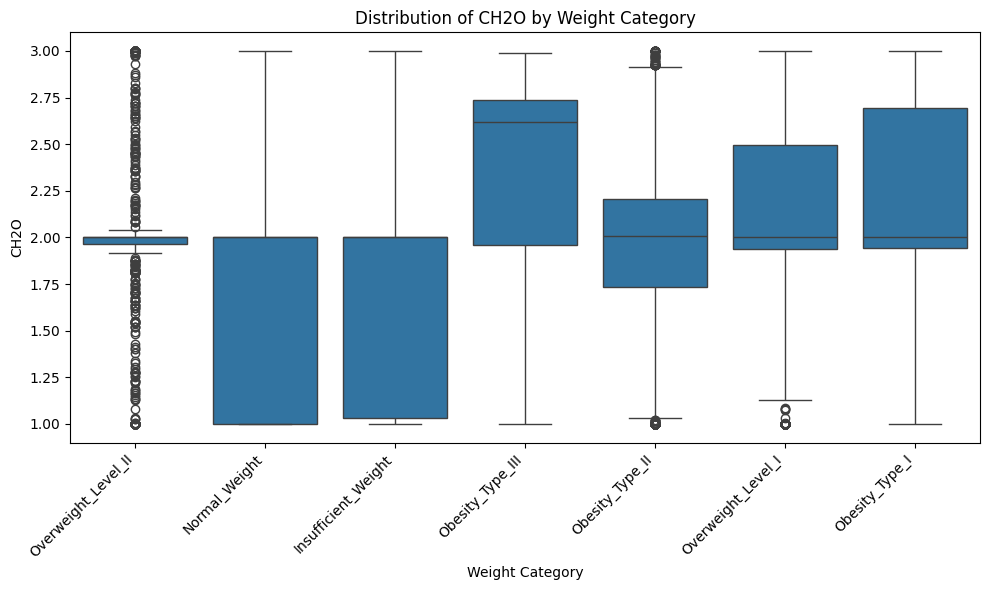

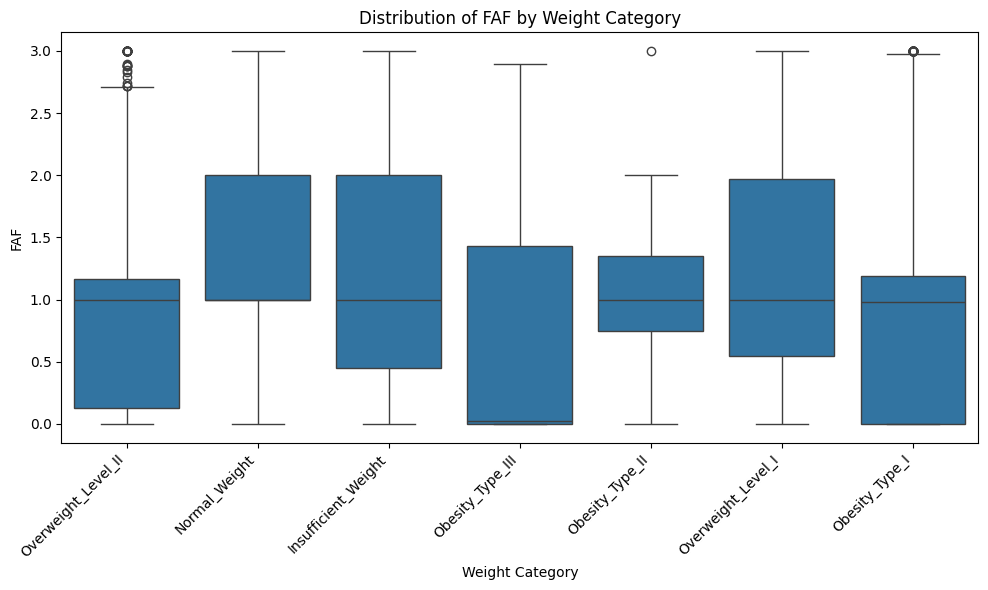

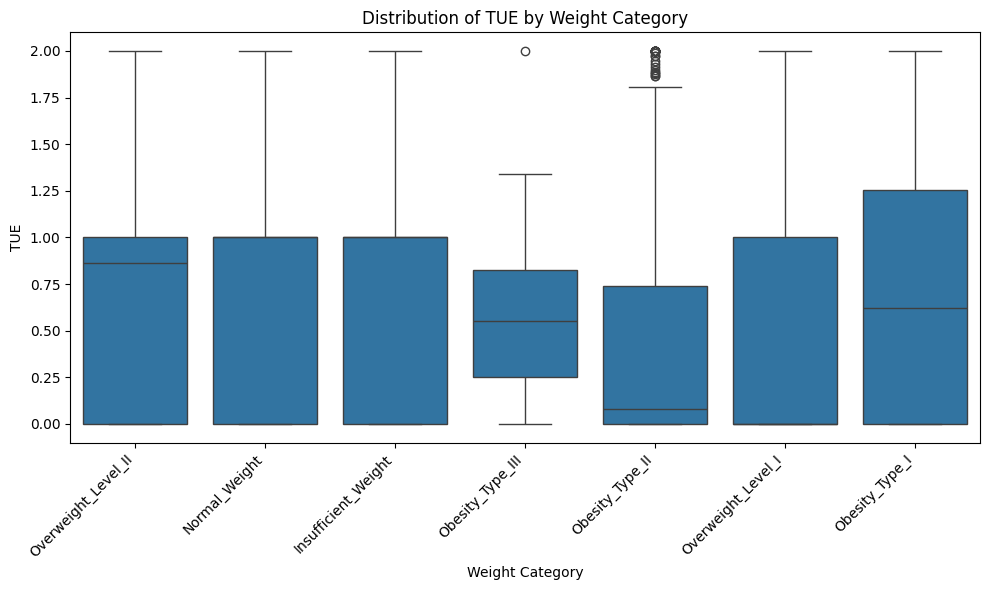

In [ ]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='WeightCategory', y=col)
    plt.title(f'Distribution of {col} by Weight Category')
    plt.xlabel('Weight Category')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

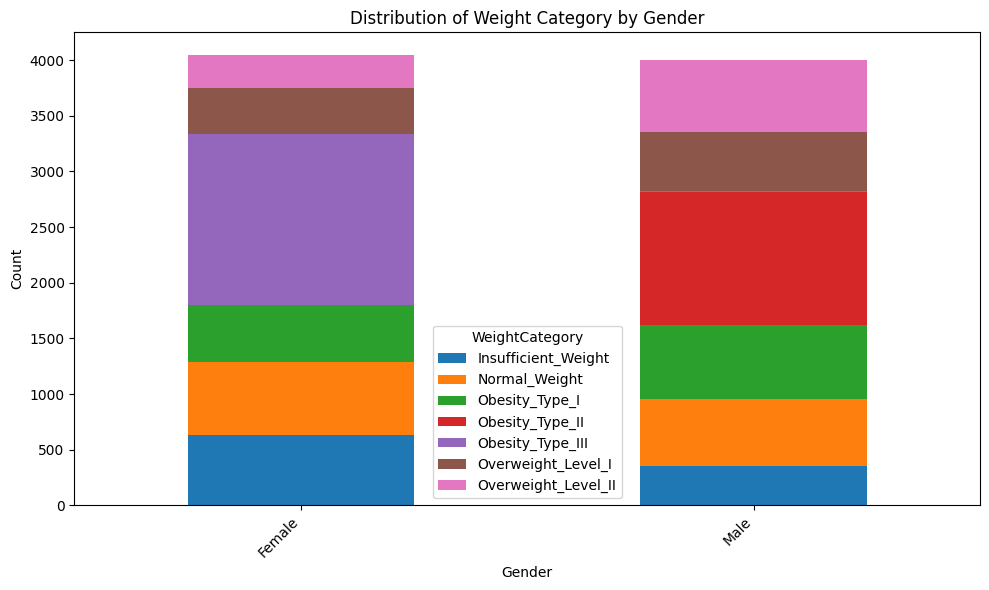

<Figure size 1000x600 with 0 Axes>

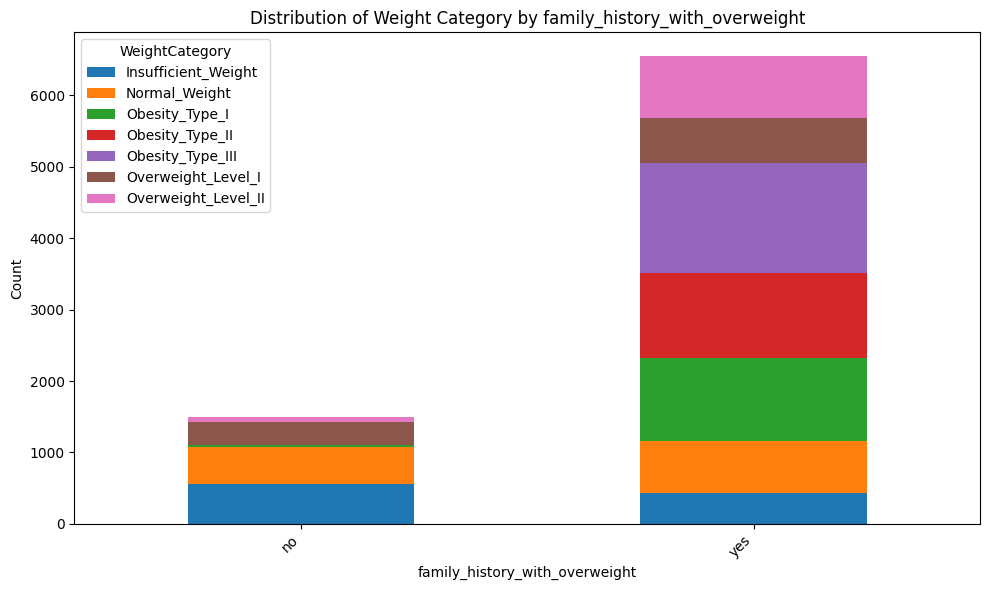

<Figure size 1000x600 with 0 Axes>

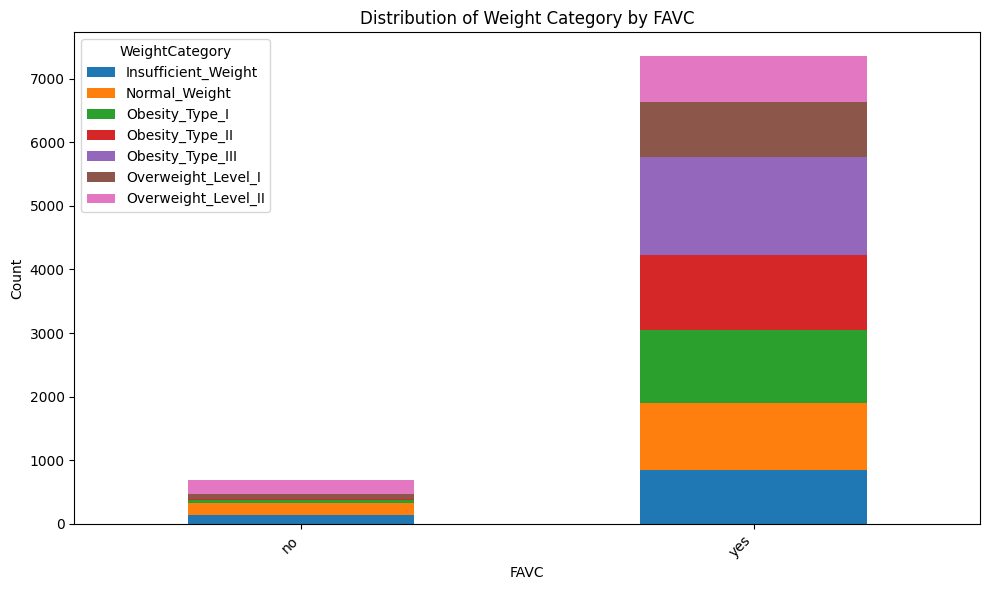

<Figure size 1000x600 with 0 Axes>

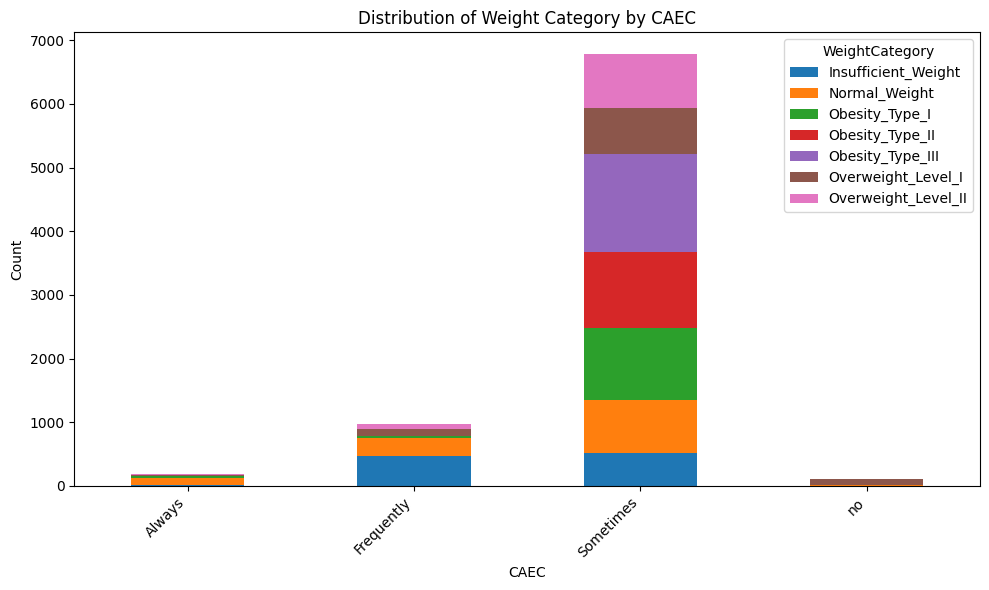

<Figure size 1000x600 with 0 Axes>

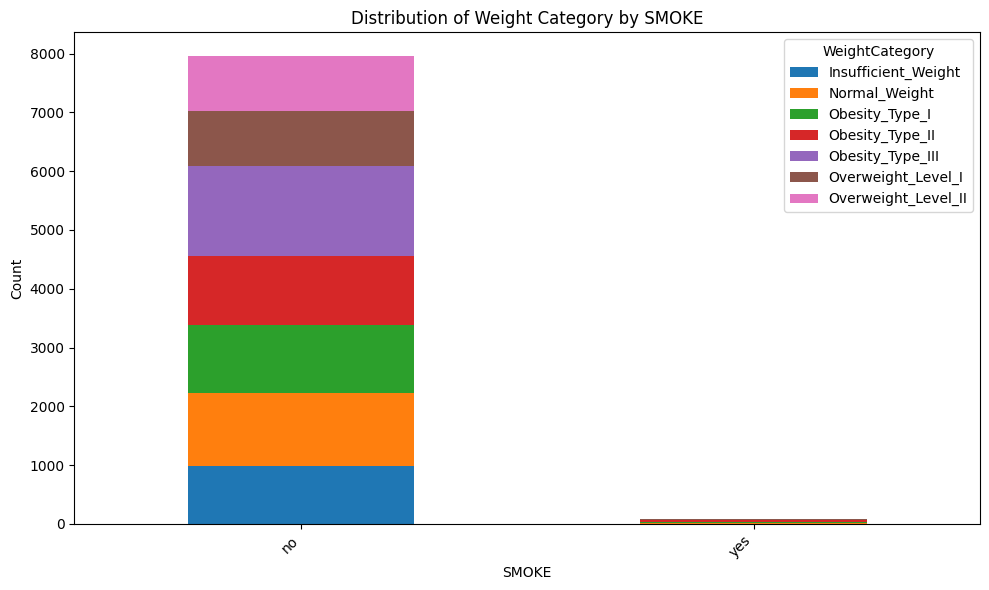

<Figure size 1000x600 with 0 Axes>

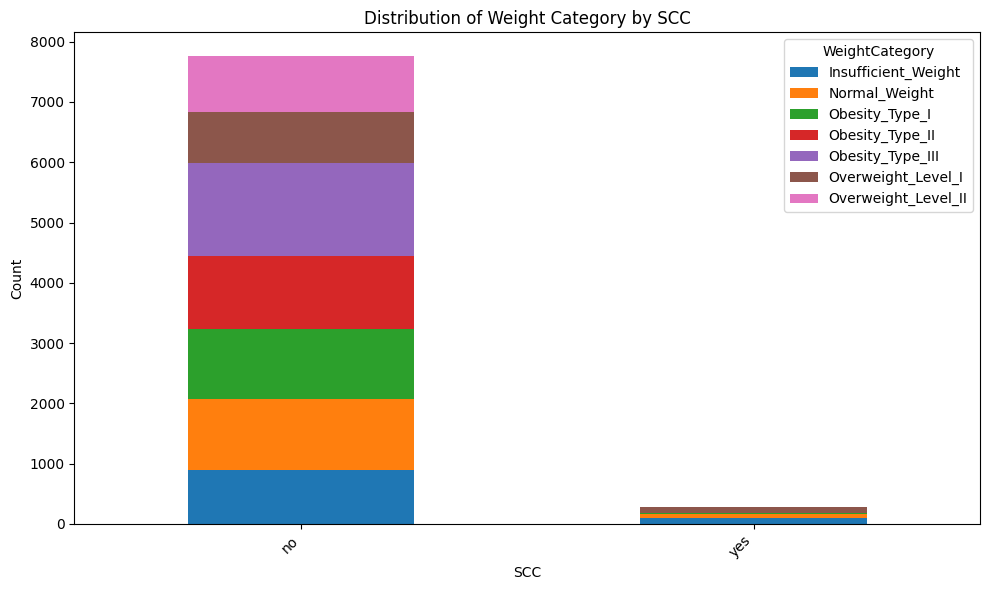

<Figure size 1000x600 with 0 Axes>

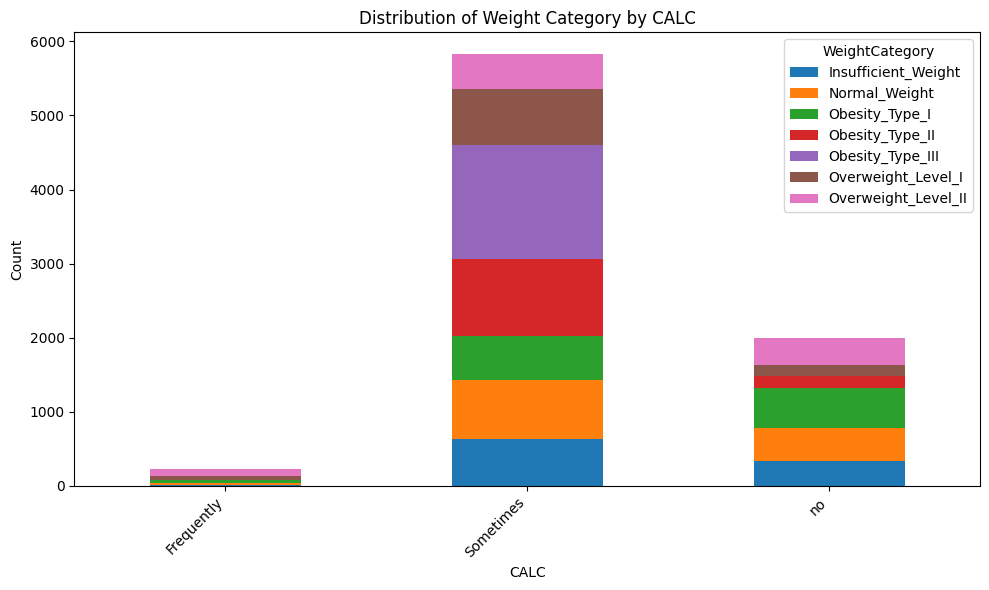

<Figure size 1000x600 with 0 Axes>

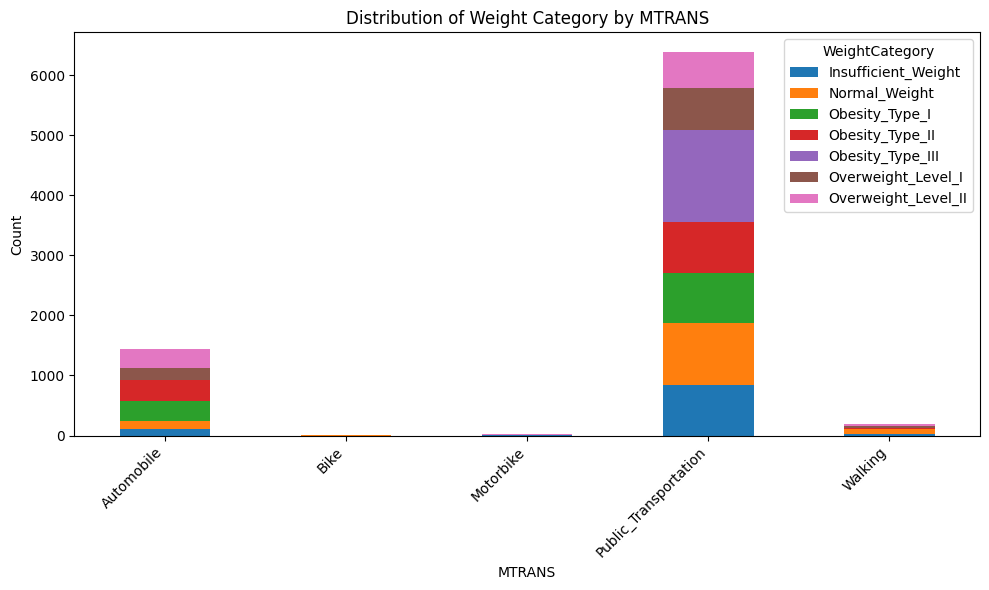

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
if 'WeightCategory' in categorical_cols:
    categorical_cols.remove('WeightCategory')
if 'id' in categorical_cols:
    categorical_cols.remove('id')

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ct = pd.crosstab(train_df[col], train_df['WeightCategory'])
    ct.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribution of Weight Category by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Calculate BMI for both train and test dataframes and add it as a new column.



In [ ]:
train_df['BMI'] = train_df['Weight'] / (train_df['Height']**2)
test_df['BMI'] = test_df['Weight'] / (test_df['Height']**2)

print("Train DataFrame with BMI:")
display(train_df.head())

print("\nTest DataFrame with BMI:")
display(test_df.head())

Train DataFrame with BMI:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151



Test DataFrame with BMI:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,15533,Female,19.007177,1.772449,137.852618,yes,yes,3.000000,3.000000,Sometimes,no,2.007348,no,1.465931,0.813235,Sometimes,Public_Transportation,43.880091
1,15534,Female,21.572114,1.698346,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.577824,1.865851,Sometimes,Public_Transportation,26.002130
2,15535,Male,22.285024,1.737453,82.000000,yes,yes,2.000000,2.720642,Sometimes,no,1.830614,no,0.451009,0.000000,Sometimes,Public_Transportation,27.163625
3,15536,Male,30.916426,1.775580,120.860386,yes,yes,2.712747,3.000000,Sometimes,no,2.144368,no,0.712726,0.100048,Sometimes,Automobile,38.335708
4,15537,Female,18.000000,1.670000,65.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,23.306680


BMI vs weight

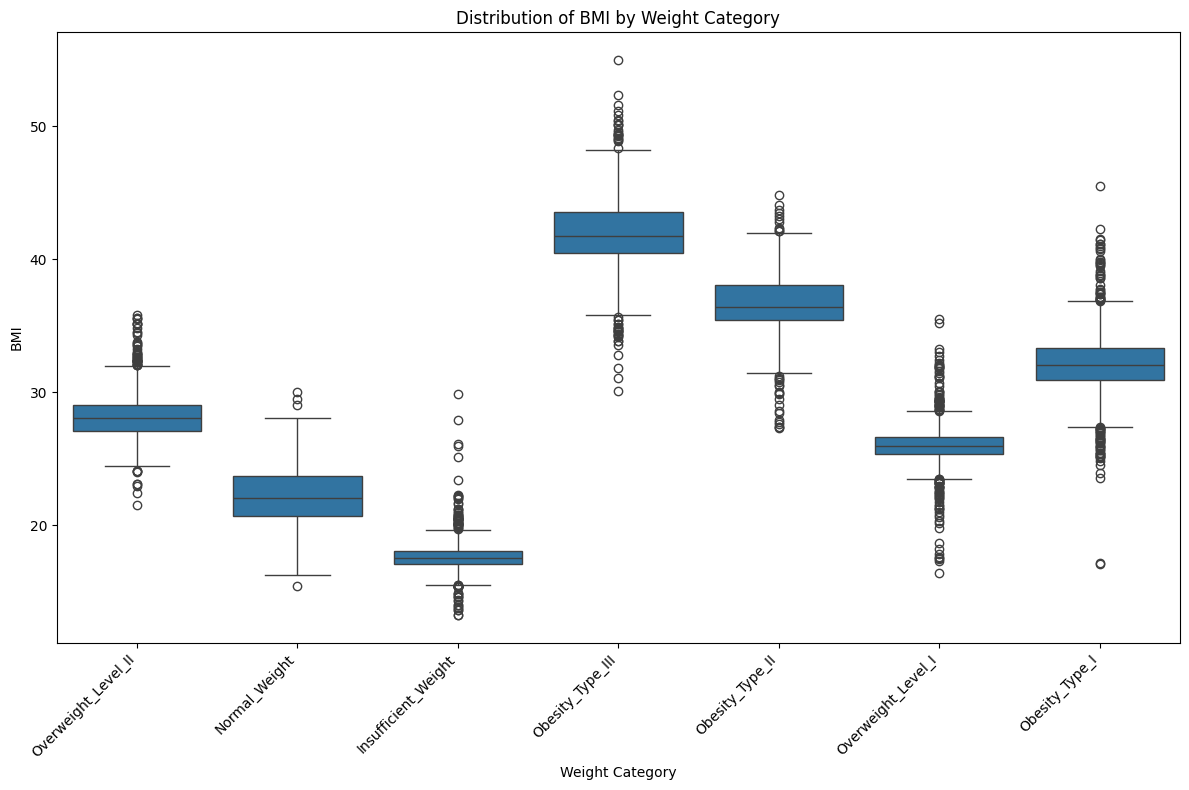

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df, x='WeightCategory', y='BMI')
plt.title('Distribution of BMI by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bmi_vs_weightcategory_boxplot.png') # Save the plot as a PNG file
plt.show()

## Visualize Correlation Heatmap




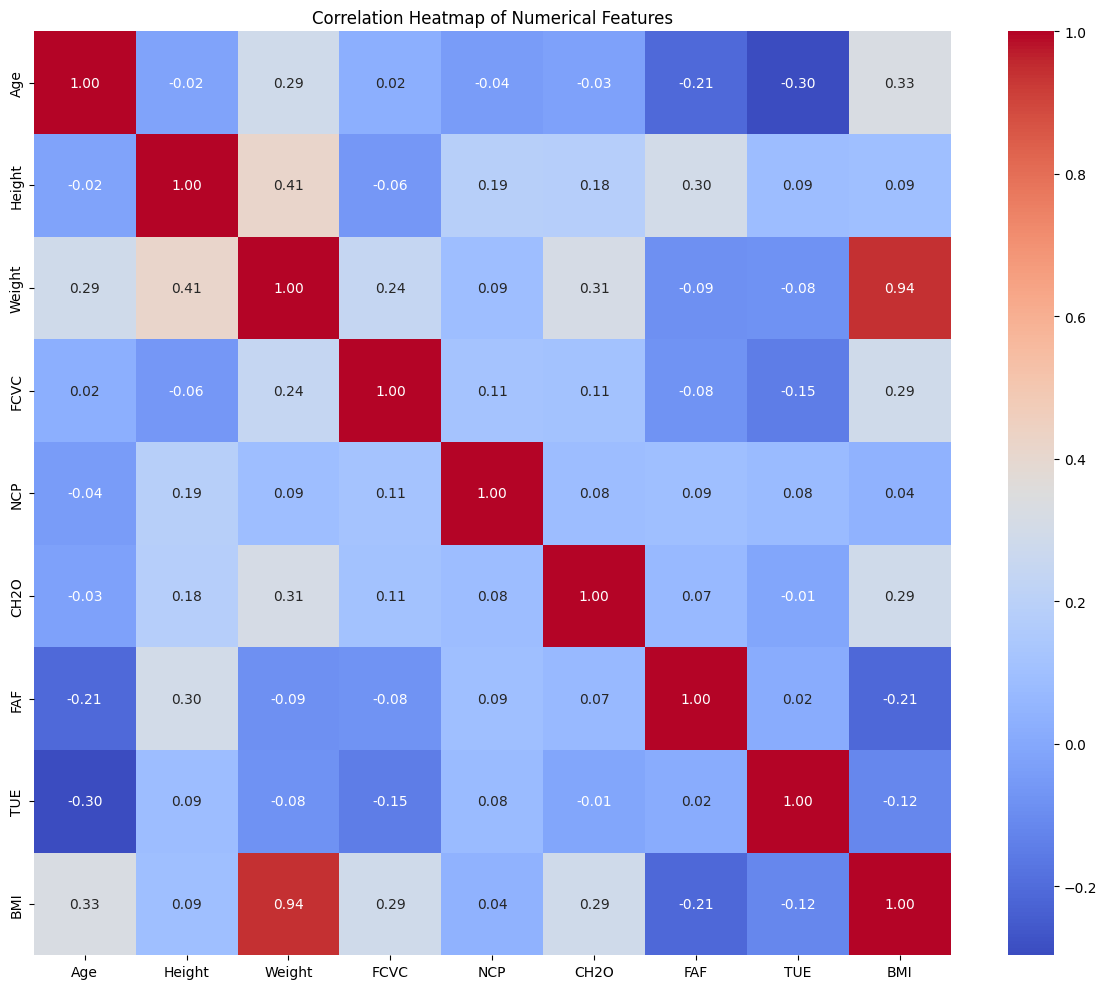

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the 'id' column as it's not relevant for correlation
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Calculate the correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png') # Save the plot as a PNG file
plt.show()

Feature Engineering


In [8]:
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Exclude the target variable 'WeightCategory' from the categorical columns to be encoded in the training set
categorical_cols_train = [col for col in categorical_cols if col != 'WeightCategory']

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols_train, drop_first=True)

# Categorical columns for test set encoding should not include 'WeightCategory'
categorical_cols_test = [col for col in categorical_cols if col != 'WeightCategory']
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols_test, drop_first=True)


# Align columns - crucial for consistent feature sets between train and test
train_cols = list(df_train_encoded.columns)
test_cols = list(df_test_encoded.columns)

# Remove target variable from train_cols if it exists
if 'WeightCategory' in train_cols:
    train_cols.remove('WeightCategory')

# Find columns unique to train or test
unique_to_train = set(train_cols) - set(test_cols)
unique_to_test = set(test_cols) - set(train_cols)

# Add missing columns to the other dataframe with default value 0
for col in unique_to_train:
    df_test_encoded[col] = 0
for col in unique_to_test:
    df_train_encoded[col] = 0

# Ensure the order of columns is the same
df_test_encoded = df_test_encoded[train_cols]


# Define X and y
X = df_train_encoded.drop(['id', 'WeightCategory'], axis=1)
y = df_train_encoded['WeightCategory']

# Define X_test
X_test = df_test_encoded.drop('id', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_test:", X_test.shape)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X: (15533, 22)
Shape of y: (15533,)
Shape of X_test: (5225, 22)
Shape of X_train: (12426, 22)
Shape of X_val: (3107, 22)
Shape of y_train: (12426,)
Shape of y_val: (3107,)


In [11]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.6 MB/s eta 0:00:00


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective_decision_tree(trial):
    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
    }
    dt_model = DecisionTreeClassifier(**param, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
    return accuracy  # Return accuracy

In [12]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective_decision_tree, n_trials=100)

print("Best trial:")
print(study.best_trial)

[I 2025-11-10 18:41:50,406] A new study created in memory with name: no-name-34d5ea9c-eff5-4cc0-91b6-9b6d4c9304b5
[I 2025-11-10 18:41:50,620] Trial 0 finished with value: 0.8590280012874155 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8590280012874155.
[I 2025-11-10 18:41:50,864] Trial 1 finished with value: 0.8603154168007725 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8603154168007725.
[I 2025-11-10 18:41:51,130] Trial 2 finished with value: 0.8590280012874155 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8603154168007725.
[I 2025-11-10 18:41:51,295] Trial 3 finished with value: 0.8667524943675571 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 3 with val

Best trial:
FrozenTrial(number=20, state=<TrialState.COMPLETE: 1>, values=[0.8696491792726102], datetime_start=datetime.datetime(2025, 11, 10, 18, 41, 55, 850080), datetime_complete=datetime.datetime(2025, 11, 10, 18, 41, 56, 305409), params={'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1)}, trial_id=20, value=None)


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

def evaluate_model(y_true, y_pred):
    """
    Evaluates the model performance using accuracy, F1, precision, and recall scores.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.

    Returns:
        A dictionary containing the evaluation scores.
    """
    accuracy = accuracy_score(y_true, y_pred)
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')

    return {
        'accuracy': accuracy,
        'f1_weighted': f1_weighted,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted
    }

# Retrieve the best hyperparameters from the completed Optuna study
best_params = study.best_params

# Create a new DecisionTreeClassifier instance with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the best model on the full training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = best_dt_model.predict(X_val)

# Evaluate the model's performance
evaluation_results = evaluate_model(y_val, y_pred_val)

# Print the evaluation results
print("Best Decision Tree Model Evaluation Results on Validation Set:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

Best Decision Tree Model Evaluation Results on Validation Set:
accuracy: 0.8696
f1_weighted: 0.8699
precision_weighted: 0.8709
recall_weighted: 0.8696


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective_random_forest(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
    }
    rf_model = RandomForestClassifier(**param, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

In [16]:
import optuna

rf_study = optuna.create_study(direction='maximize', study_name='rf_study')
rf_study.optimize(objective_random_forest, n_trials=100)

print("Best trial for Random Forest:")
print(rf_study.best_trial)

[I 2025-11-10 18:44:18,519] A new study created in memory with name: rf_study
[I 2025-11-10 18:44:25,040] Trial 0 finished with value: 0.8838107499195366 and parameters: {'n_estimators': 223, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8838107499195366.
[I 2025-11-10 18:44:30,524] Trial 1 finished with value: 0.8847763115545543 and parameters: {'n_estimators': 276, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8847763115545543.
[I 2025-11-10 18:44:31,759] Trial 2 finished with value: 0.6939169616993884 and parameters: {'n_estimators': 237, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 1 with value: 0.8847763115545543.
[I 2025-11-10 18:44:34,828] Trial 3 finished with value: 0.8847763115545543 and parameters: {'n_estimators': 247, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf

Best trial for Random Forest:
FrozenTrial(number=20, state=<TrialState.COMPLETE: 1>, values=[0.8944319279047312], datetime_start=datetime.datetime(2025, 11, 10, 18, 45, 2, 665582), datetime_complete=datetime.datetime(2025, 11, 10, 18, 45, 6, 53605), params={'n_estimators': 199, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, trial_id=20, value=None)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Retrieve the best hyperparameters from the completed Optuna study
best_params_rf = rf_study.best_params

# Create a new RandomForestClassifier instance with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)

# Train the best model on the full training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_rf = best_rf_model.predict(X_val)

# Evaluate the model's performance
evaluation_results_rf = evaluate_model(y_val, y_pred_val_rf)

# Print the evaluation results
print("Best Random Forest Model Evaluation Results on Validation Set:")
for metric, value in evaluation_results_rf.items():
    print(f"{metric}: {value:.4f}")

Best Random Forest Model Evaluation Results on Validation Set:
accuracy: 0.8944
f1_weighted: 0.8944
precision_weighted: 0.8955
recall_weighted: 0.8944


In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def objective_xgboost(trial):
    param = {
        'objective': 'multi:softmax',
        'num_class': 7, # Based on the number of unique WeightCategory values
        'eval_metric': 'mlogloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42,
        'use_label_encoder': False
    }

    # Encode target variable
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)

    xgb_model = xgb.XGBClassifier(**param)
    xgb_model.fit(X_train, y_train_encoded)
    y_pred = xgb_model.predict(X_val)
    accuracy = accuracy_score(y_val_encoded, y_pred)
    return accuracy

In [19]:
import optuna

xgb_study = optuna.create_study(direction='maximize', study_name='xgb_study')
xgb_study.optimize(objective_xgboost, n_trials=100)

print("Best trial for XGBoost:")
print(xgb_study.best_trial)

[I 2025-11-10 18:51:22,418] A new study created in memory with name: xgb_study
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:51:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-11-10 18:51:30,467] Trial 0 finished with value: 0.8992597360798198 and parameters: {'n_estimators': 220, 'learning_rate': 0.2749481275563845, 'max_depth': 4, 'subsample': 0.8739470666343324, 'colsample_bytree': 0.648069898475175}. Best is trial 0 with value: 0.8992597360798198.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:51:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-11-10 18:51:34,054] Trial 1 finished with value: 0.8979723205664628 and parameters: {'n_estimators': 200, 'learning_rate': 0.2556681695250672, 'max_depth': 8, 'subsample': 0.6

Best trial for XGBoost:
FrozenTrial(number=64, state=<TrialState.COMPLETE: 1>, values=[0.9105246218216929], datetime_start=datetime.datetime(2025, 11, 10, 18, 57, 27, 735663), datetime_complete=datetime.datetime(2025, 11, 10, 18, 57, 34, 440945), params={'n_estimators': 225, 'learning_rate': 0.01831473891340347, 'max_depth': 10, 'subsample': 0.6909161156421971, 'colsample_bytree': 0.6735578641526054}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=None)}, trial_id=64, value=None)


In [20]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Encode the target variable for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Retrieve the best hyperparameters from the completed Optuna study
best_params_xgb = xgb_study.best_params

# Create a new XGBoostClassifier instance with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params_xgb, random_state=42, use_label_encoder=False)

# Train the best model on the full training data (encoded target)
best_xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_pred_val_xgb = best_xgb_model.predict(X_val)

# Evaluate the model's performance
evaluation_results_xgb = evaluate_model(y_val_encoded, y_pred_val_xgb)

# Print the evaluation results
print("Best XGBoost Model Evaluation Results on Validation Set:")
for metric, value in evaluation_results_xgb.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Model Evaluation Results on Validation Set:
accuracy: 0.9105
f1_weighted: 0.9106
precision_weighted: 0.9108
recall_weighted: 0.9105


In [21]:
print("Model Performance Comparison on Validation Set:")
print("\nDecision Tree:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

print("\nRandom Forest:")
for metric, value in evaluation_results_rf.items():
    print(f"{metric}: {value:.4f}")

print("\nXGBoost:")
for metric, value in evaluation_results_xgb.items():
    print(f"{metric}: {value:.4f}")

Model Performance Comparison on Validation Set:

Decision Tree:
accuracy: 0.8696
f1_weighted: 0.8699
precision_weighted: 0.8709
recall_weighted: 0.8696

Random Forest:
accuracy: 0.8944
f1_weighted: 0.8944
precision_weighted: 0.8955
recall_weighted: 0.8944

XGBoost:
accuracy: 0.9105
f1_weighted: 0.9106
precision_weighted: 0.9108
recall_weighted: 0.9105
